In [2]:
#Imports for visualization
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [3]:
#Get providers from our account
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')

In [4]:
#Quantum circuit based on a Bell state
bell =  QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

#Quantum circuit of measurement
meas = QuantumCircuit(2, 2)
meas.measure([0, 1], [0, 1])

#Merging both circuits
backend = BasicAer.get_backend('qasm_simulator')
circ = bell + meas
result = execute(circ, backend, shots=1024).result()
counts = result.get_counts(circ)
counts

{'11': 490, '00': 534}

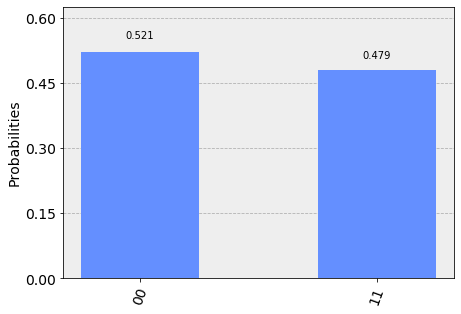

In [5]:
plot_histogram(counts)

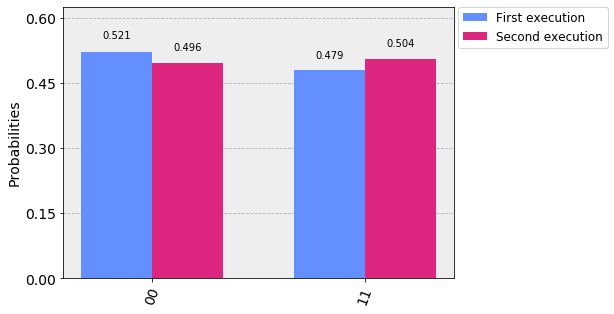

In [10]:
#Execute again
result2 = execute(circ, backend, shots=1024).result()
counts2 = result2.get_counts(circ)
#Ploting with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, counts2], legend=legend)

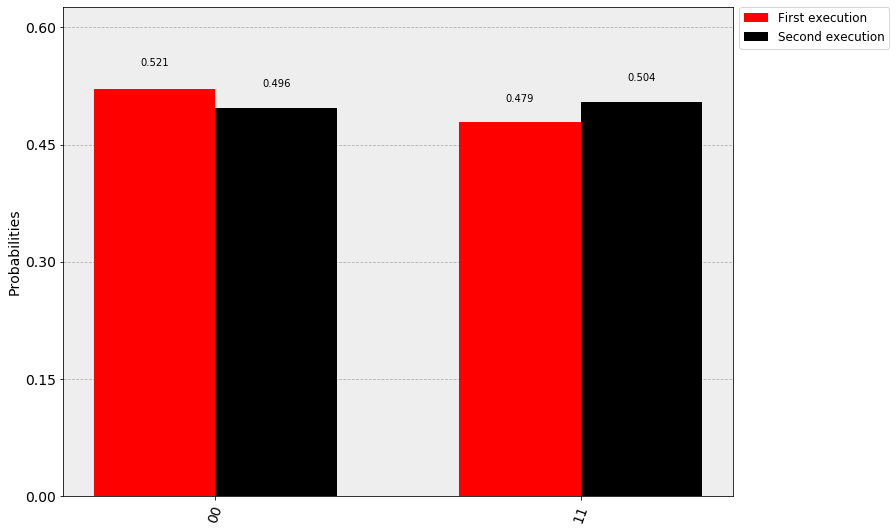

In [14]:
#Another style of ploting
plot_histogram([counts, counts2],       
               legend=legend,           
               sort='asc',             #Descending order like 11 to 00 or 00 to 11
               figsize=(12,9),         #Size of the plot bars  
               color=['red', 'black'], #Color of the bars
               bar_labels=True)        #Set the amplitude of each probability 

In [ ]:
#This circuit encode a qubit state into a bit-string
qc = QuantumCircuit(5, 4)
qc.x(4)
for idx in range(5):
    qc.h(idx)
qc.barrier()
qc.cx(0, 4)
qc.cx(1, 4)
qc.cx(3, 4)
qc.barrier()
for idx in range(4):
    qc.h(idx)
qc.measure([0,1,2,3], [0,1,2,3])
qc.draw()